# 1. Import the relevant libraries or packages and modify the settings

My first step will be to import all the relevant libraries and packages that will allow you to perform cluster analysis and to visualise the results.

The most commonly used packages can be imported with the following lines of code.

In [1]:
import warnings
warnings.filterwarnings("ignore")
from __future__ import division

import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.cluster import KMeans

WIth the following code cell, you can set the colours and palettes for the seaborn graphing package that you imported in the previous step. 

In [2]:
pred = '#e63635'
pgrey = '#3c3f41'
mgrey = '#b2b3b3'
lgrey = '#edebeb'
purp = '#ab66cc'
amet = '#8371e2'
turq = '#7ce6d8'
blue = '#55acee'
whit = '#ffffff'

# Define a colour palette
LSEpalt1 = [pred, pgrey, purp, amet]
LSEpalt2 = [pred, purp, turq, blue]
LSEpalt3 = [pred, purp, turq, amet, blue]

**IMPORTANT:** To ensure that the results are consistent (no matter how many times you perform or run the analysis), it's important to set a random number seed, which ensures better replicability.

In [3]:
random.seed(123)

# 2. Importing, reading, and checking the data file

With the relevant libraries and packages successfully imported, the next step is to import the data file and ensure that the data loads correctly. In this case, you will import a csv data  which is a collection of ABC customer demographic and transactional data.

In [4]:
df0 = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\EVERYTHING DATA\DATASETS\ABC.csv", error_bad_lines = False, engine='python')

Once you have imported the data, it's important to check that the data that has been loaded is correct. This can be assessed by reading in the row and column names of the data set and ensuring that these align with the correct data file.

In [5]:
# First, you can analyse what the data set looks like
df0

,Investor_id,Gender,Age,ComfortDigital,KnowledgeFM,FrequencyTransact,RiskAversion
0,100001,1,23,4,1,5,1
1,100002,1,66,2,5,2,5
2,100003,0,25,5,1,2,1
3,100004,1,18,5,1,4,1
4,100005,1,70,1,3,4,5
...,...,...,...,...,...,...,...
7995,107996,0,49,1,5,1,4
7996,107997,1,24,5,1,1,1
7997,107998,1,46,3,4,2,5
7998,107999,0,24,5,1,3,1


In [6]:
print(" rows read in = ", df0.shape)
df0 = df0.dropna()
print(" rows after dropna = ", df0.shape)

 rows read in =  (8000, 7)
 rows after dropna =  (8000, 7)


Now that the correct data set is loaded, I can use this data to help segment customers into distinct clusters. 

# 3. Cluster analysis for customer segmentation

The business, ABC, is trying to decide which products to provide to which customers. In other words, which customers ought to be provided which products? Conducting a segmentation analysis is the first step in finding the answer to this query. A formal method for creating client segments is cluster analysis which I will be creating meaningful segments for ABC using k-means cluster algorithm. 

I, the marketing analyst, is required to specify the ideal number of clusters in the first step of the procedure. I can choose an ideal quantity using a variety of statistical factors in addition to managerial discretion. The approach that plots the inside sum-of-squares (WSS) values for various cluster densities. These lines of code are used to do this.

In [7]:
# The code below produces the elbow function and chart.

df_cluster = df0[['Gender', 'Age', 'ComfortDigital', 'KnowledgeFM','FrequencyTransact', 'RiskAversion']]
df_cluster_array = df_cluster.to_numpy()

In [8]:
# This user-defined function can be used to create the elbow curve.

def udf_cluster_elbow(p_arr, p_maxn, p_title, p_xlabel, p_save):
    sse={}
    for k in range(1,p_maxn):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(p_arr)
        sse[k] = kmeans.inertia_ 
    
    plt.figure(figsize=(8,6))
    plt.plot(list(sse.keys()), list(sse.values()), color="#e63635", linewidth=3.0)
    plt.title(p_title, size=24)
    plt.xlabel(p_xlabel, size=18, fontweight='bold')
    plt.ylabel('Within sum-of-squares (WSS)', size=18, fontweight='bold')
    if  (len(p_save) > 0):
        plt.savefig(p_save)
    else:
        plt.show()
    plt.close()

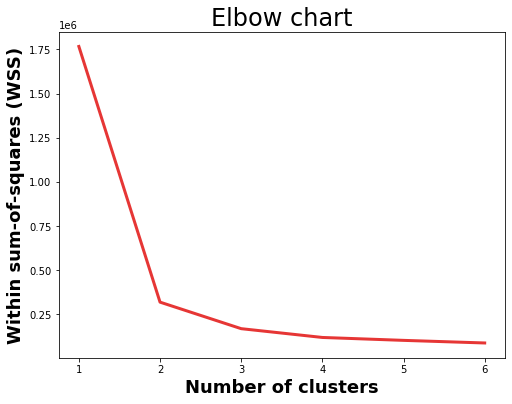

In [9]:
# Plot the elbow.

udf_cluster_elbow(p_arr=df_cluster_array, p_maxn=7, p_title="Elbow chart", p_xlabel="Number of clusters", p_save='')

Based on what I know about the elbow method, the number of clusters would you select as most optimal for this data set is two clusters.

# 4. Fitting the data to the optimal number of clusters
We now have a rough sense of the ideal number clusters based on the elbow chart I made earlier. We will proceed with this task by identifying two clusters as the best possible outcome. 


We can carry out the k-means clustering technique using the following lines of code and determine whether the resulting clusters are significant and practical for business needs. 

In [10]:
## The first column of the data set is an investor ID (This needs to be kept so that it can be tied back to the data).

df1 = df0[['Investor_id', 'Gender', 'Age', 'ComfortDigital', 'KnowledgeFM','FrequencyTransact', 'RiskAversion']]
def udf_kmeans(p_df, p_n, p_scale=0):
    f1_df = p_df.iloc[:,1:p_df.shape[1]] 
    if   (p_scale==0):
         f1_df_s = f1_df
    else:
         f1_df_s = StandardScaler().fit_transform(p1_df)
         
    f1_df_array = f1_df_s.to_numpy()
    
    kmeans = KMeans(n_clusters=p_n, random_state=2493)
    kmeans.fit(f1_df_array)
    p_df['ClusterNum'] = kmeans.predict(f1_df_array)
    o_stat = p_df.iloc[:,1:p_df.shape[1]].groupby('ClusterNum').describe()
    stat2 = o_stat.T
    o_df_means = pd.DataFrame()
    o_df_medians = pd.DataFrame()
    o_df_cov = pd.DataFrame()
    for i in range(1, p_df.shape[1]-1):
        colname=p_df.columns.values[i]
        o_df_means[colname] = o_stat[colname]['mean'] 
        o_df_medians[colname] = o_stat[colname]['50%'] 
        o_df_cov[colname] = o_stat[colname]['std']/o_stat[colname]['mean']
    
    o_df_means.index = range(0,p_n)
    o_df_medians.index = range(0,p_n)

    return p_df, o_df_means, o_df_medians, o_df_cov
    

df1_c, df1_means, df1_medians, df1_cov = udf_kmeans(p_df=df1, p_n=2, p_scale=0)

The steps for the <i>k</i>-means clustering algorithm are now complete.

Next, you can move on to name the clusters. To achieve this meaningfully, you first need to examine how the averages (or other descriptive statistics) of the variables differ across different clusters that were created. The following lines of code first identify how many observations (or data points) are housed within each cluster.

In [11]:
# Print the counts of observations (i.e. number of people) in each cluster.

print('counts of observations in each cluster')
df1_c.ClusterNum.value_counts()

counts of observations in each cluster


1    5985
0    2015
Name: ClusterNum, dtype: int64

You notice that the clusters are fairly large in size, with a large number of people housed within each.

Next, I will calculate the mean value for each variable within the two clusters that were created using the following lines of code.

In [12]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_cluster_array)
df1['ClusterNum'] = kmeans.predict(df_cluster_array)
stat1 = df1.groupby('ClusterNum').describe()
stat2 = stat1.T

In [13]:
# First, you can view what the means of the variables look like across the 2 different clusters.

df_means = pd.DataFrame({
            'Gender': stat1['Gender']['mean'] 
            , 'Age': stat1['Age']['mean'] 
            , 'ComfortDigital': stat1['ComfortDigital']['mean'] 
            , 'KnowledgeFM': stat1['KnowledgeFM']['mean'] 
            , 'FrequencyTransact': stat1['FrequencyTransact']['mean'] 
            , 'RiskAversion': stat1['RiskAversion']['mean']           
            }, index=[0,1])
df_means

,Gender,Age,ComfortDigital,KnowledgeFM,FrequencyTransact,RiskAversion
0,0.551044,25.224227,3.980618,2.063158,4.138179,1.668003
1,0.556328,56.017370,2.407940,3.585608,2.368734,3.846154


Based on the output, can you create meaningful descriptions of the two clusters? In other words, can you differentiate them in terms of the six variables that describe the customers?

Customers in Cluster 0 are the youngest with an average age of 25 years old, highly comfortable with using digital platforms to conduct financial transactions, have low knowledge about the financial markets, low on risk aversion, and are very high on transaction frequency, in other words, they are young individuals who prefer digital methods of conducting financial transactions basically tech-savvy. They have low knowledge about financial markets, indicating they are new investors who are new to investing. They are low on risk aversion and have a very high frequency of transactions indicating they are active traders who prefer growth-oriented investment products such as stocks that offer higher returns but are considered riskier.

Customers in Cluster 1 are the oldest with an average age of 56 years old, they have the lowest level of comfort with using digital platforms to conduct financial transactions, have high knowledge about the financial markets, are very high on risk aversion, and are very low on transaction frequency, in other words, they are middle-aged individuals who prefer traditional methods of conducting financial transactions and have low comfort levels with using digital platforms. They have a high level of knowledge about financial markets, indicating that they may be experienced investors. They are very risk-averse, meaning that they are more likely to choose investment products that offer lower returns but are considered safer. Finally, they have a very low frequency of transactions, indicating that they are not active traders

Although, there is a similarity observed. I noticed that both clusters  seem evenly divided as far as gender is concerned meaning that both clusters are very similar with respect to gender variable.


Next, you will look at what the medians of the variables look like across the two different clusters.

In [14]:
df_medians = pd.DataFrame({
            'Gender': stat1['Gender']['50%'] 
            , 'Age': stat1['Age']['50%'] 
            , 'ComfortDigital': stat1['ComfortDigital']['50%'] 
            , 'KnowledgeFM': stat1['KnowledgeFM']['50%'] 
            , 'FrequencyTransact': stat1['FrequencyTransact']['50%'] 
            , 'RiskAversion': stat1['RiskAversion']['50%'] 
            }, index=[0,1])

df_medians

,Gender,Age,ComfortDigital,KnowledgeFM,FrequencyTransact,RiskAversion
0,1.0,24.0,4.0,2.0,5.0,1.0
1,1.0,57.0,2.0,4.0,2.0,5.0


In [15]:
stat2

ClusterNum                           0              1
Investor_id       count    5985.000000    2015.000000
                  mean   104014.059983  103960.223821
                  std      2319.657323    2279.341316
                  min    100001.000000  100002.000000
                  25%    102013.000000  101947.000000
                  50%    103991.000000  104021.000000
                  75%    106035.000000  105905.500000
                  max    108000.000000  107998.000000
Gender            count    5985.000000    2015.000000
                  mean        0.551044       0.556328
                  std         0.497429       0.496940
                  min         0.000000       0.000000
                  25%         0.000000       0.000000
                  50%         1.000000       1.000000
                  75%         1.000000       1.000000
                  max         1.000000       1.000000
Age               count    5985.000000    2015.000000
                  mean       25.224227      56.017370
                  std         4.526162       8.292397
                  min        18.000000      41.000000
                  25%        23.000000      49.000000
                  50%        24.000000      57.000000
                  75%        26.000000      62.000000
                  max        41.000000      79.000000
ComfortDigital    count    5985.000000    2015.000000
                  mean        3.980618       2.407940
                  std         1.204087       1.412575
                  min         1.000000       1.000000
                  25%         3.000000       1.000000
                  50%         4.000000       2.000000
                  75%         5.000000       4.000000
                  max         5.000000       5.000000
KnowledgeFM       count    5985.000000    2015.000000
                  mean        2.063158       3.585608
                  std         1.290269       1.500576
                  min         1.000000       1.000000
                  25%         1.000000       2.000000
                  50%         2.000000       4.000000
                  75%         3.000000       5.000000
                  max         5.000000       5.000000
FrequencyTransact count    5985.000000    2015.000000
                  mean        4.138179       2.368734
                  std         1.315575       1.470503
                  min         1.000000       1.000000
                  25%         3.000000       1.000000
                  50%         5.000000       2.000000
                  75%         5.000000       3.000000
                  max         5.000000       5.000000
RiskAversion      count    5985.000000    2015.000000
                  mean        1.668003       3.846154
                  std         1.213871       1.504760
                  min         1.000000       1.000000
                  25%         1.000000       3.000000
                  50%         1.000000       5.000000
                  75%         2.000000       5.000000
                  max         5.000000       5.000000

Its important to note that, while requesting the medians, I will also be able to receive information on the variable averages (or means). In fact, you can request information on the mean, median, standard deviation, minimum, maximum and the three quartiles (25%, 50%, and 75%). This would give me a more complete picture of the different clusters and what variables describe and distinguish them from one another. This can be achieved using the `stat2` command. 

<b>Note:</b> We can ignore statistics for the `Investor_id` variable, since descriptive statistics on this variable are meaningless. 

# 5. Individual plots of cluster features: a visual story

Next, we can create graphical outputs of the variables that make up each of the two clusters using some visualisation techniques.

The first I will create are jitter plots (overlayed on top of box plots) for the various variables in each cluster.

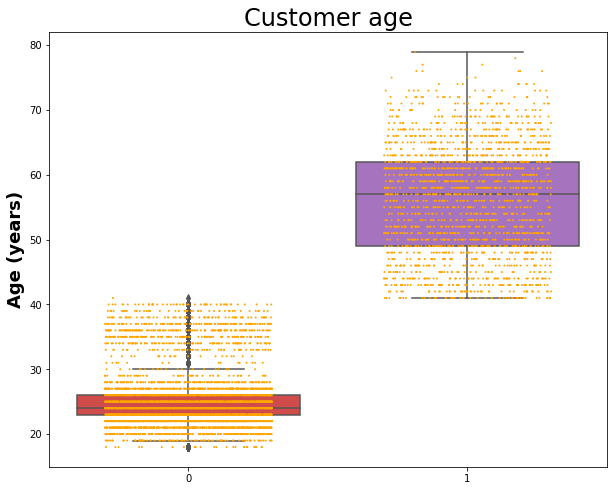

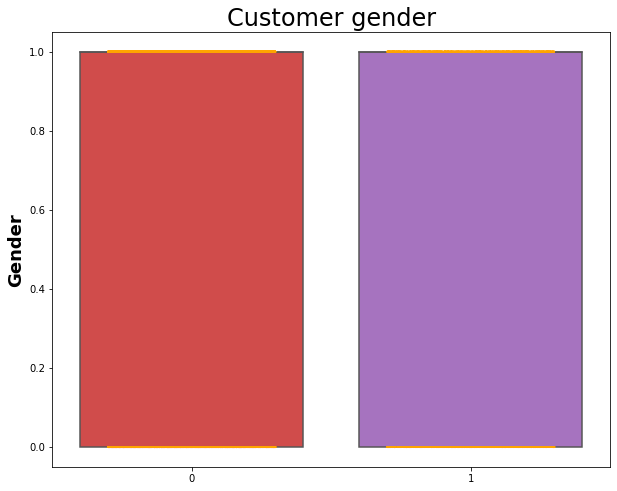

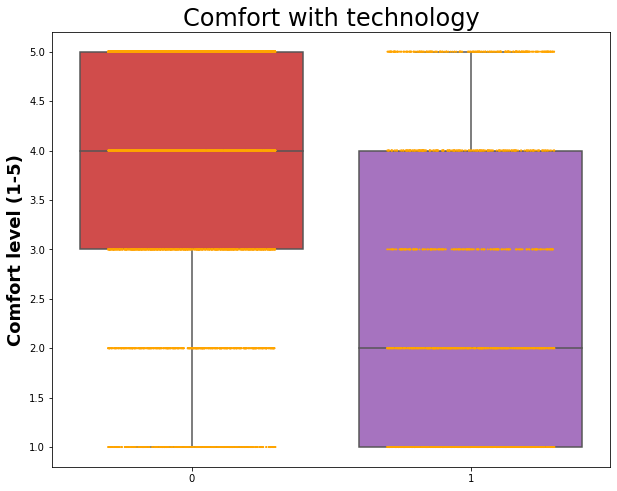

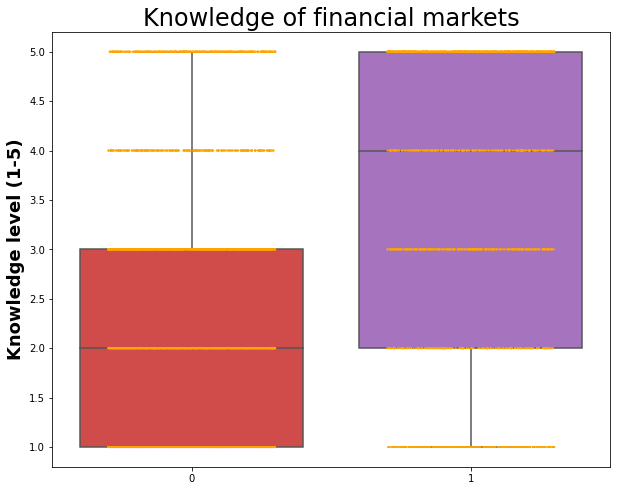

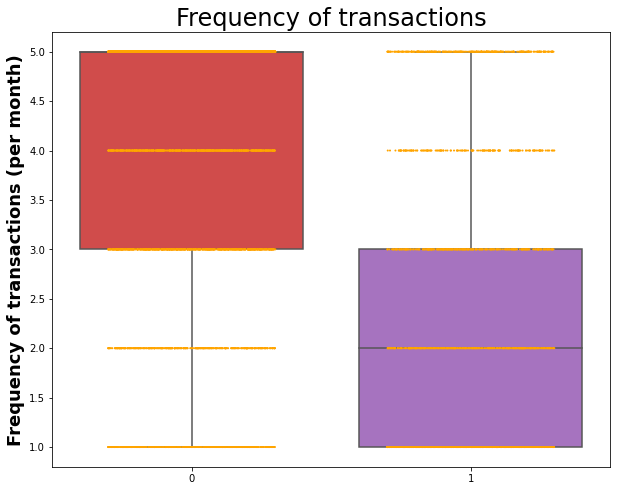

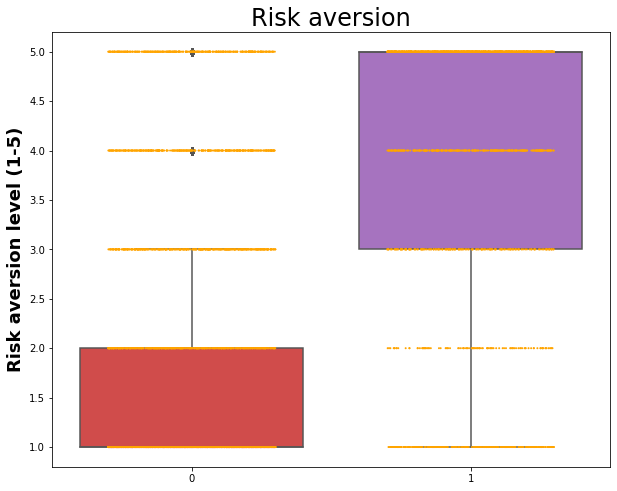

In [16]:
def udf_box23plot(p_load, p_x, p_y, p_hue, p_palette, p_title, p_xlabel, p_ylabel, p_save):
    ax=plt.figure(figsize=(10,8))
    if   (p_load=="one"):
          ax = sns.boxplot(y=p_y, palette=LSEpalt2)
    elif (p_load=="two"):
          ax = sns.boxplot(x=p_x, y=p_y, palette=LSEpalt2)
    elif (p_load=="hue"):
          ax = sns.boxplot(x=p_x, y=p_y, hue=p_hue, palette=LSEpalt2)
          plt.legend(loc='upper left')

    ax = sns.stripplot( x=p_x, y=p_y, color="orange", jitter=0.3, size=2.0)
    plt.title(p_title, size=24)
    plt.xlabel(p_xlabel, size=18, fontweight='bold')
    plt.ylabel(p_ylabel, size=18, fontweight='bold')
    if  (len(p_save) > 0):
        plt.savefig(p_save)
    else:
        plt.show()
    plt.close()

# The file is blank, so we display the graph and don't save the fig to disk.
v_save= ""

udf_box23plot(p_load="two", p_x=df1_c["ClusterNum"], p_y=df1_c["Age"], p_hue="", p_palette=LSEpalt2, p_title="Customer age", p_xlabel="", p_ylabel="Age (years)", p_save=v_save)
udf_box23plot(p_load="two", p_x=df1_c["ClusterNum"], p_y=df1_c["Gender"], p_hue="", p_palette=LSEpalt2, p_title="Customer gender", p_xlabel="", p_ylabel="Gender", p_save=v_save)
udf_box23plot(p_load="two", p_x=df1_c["ClusterNum"], p_y=df1_c["ComfortDigital"], p_hue="", p_palette=LSEpalt2, p_title="Comfort with technology", p_xlabel="", p_ylabel="Comfort level (1-5)", p_save=v_save)
udf_box23plot(p_load="two", p_x=df1_c["ClusterNum"], p_y=df1_c["KnowledgeFM"], p_hue="", p_palette=LSEpalt2, p_title="Knowledge of financial markets", p_xlabel="", p_ylabel="Knowledge level (1-5)", p_save=v_save)
udf_box23plot(p_load="two", p_x=df1_c["ClusterNum"], p_y=df1_c["FrequencyTransact"], p_hue="", p_palette=LSEpalt2, p_title="Frequency of transactions", p_xlabel="", p_ylabel="Frequency of transactions (per month)", p_save=v_save)
udf_box23plot(p_load="two", p_x=df1_c["ClusterNum"], p_y=df1_c["RiskAversion"], p_hue="", p_palette=LSEpalt2, p_title="Risk aversion", p_xlabel="", p_ylabel="Risk aversion level (1-5)", p_save=v_save)


For some variables such as gender, comfort level with digitial knowledge of financial markets, frequency of transactions, and risk aversion) the box plot is useful while the jitter plot does not provide meaningful information. Why do you think is this the case?

Answer: An effective tool for displaying the distribution of data is a box plot. It displays a dataset's median, quartiles, and outliers. The data can be examined for trends and patterns using this information. When there are few data points, a jitter plot, a form of scatter plot, is used to show how the data are distributed. Each data point receives a small amount of random noise, which aids in identifying overlapping points.

Next, I will attempt to combine some of the visuals into a single plot for even easier visualisation. Note that the variable, `Age`, will be in a plot of its own and all the remaining variables will be grouped into a second plot. This is in order to ensure that variables on vastly different scales are analysed using separate plots.

In [17]:
def udf_violin_plot(p_y, p_title, p_ylabel, p_xticklabels=[''], p_xticks=[1]):
    fig, ax = plt.subplots(figsize=(10,8))
    # Create the boxplot
    violin_parts  = ax.violinplot(p_y, showextrema=True, showmeans=True, showmedians=True)
    # Color all the violin statistics:
    for partname in ('cmeans', 'cmedians', 'cbars','cmins','cmaxes' ):
        vp = violin_parts[partname]
        if    (partname=='cmeans'):
              vp.set_edgecolor(purp)
              vp.set_linewidth(2)
        elif  (partname=='cmedians'):
              vp.set_edgecolor(pred)
              vp.set_linewidth(3)
        else:
              vp.set_edgecolor(pgrey)
              vp.set_linewidth(2)
    # Color the violin body and border:
    for vp in violin_parts['bodies']:
        vp.set_facecolor(blue)
        vp.set_edgecolor(blue)
        vp.set_linewidth(1)
        vp.set_alpha(0.5)
    # add title and axis labels
    ax.set_title(p_title, size=24)
    #ax.set_xlabel(p_xlabel)  ## 'x-axis'
    ax.set_ylabel(p_ylabel, size=18, fontweight='bold')
    # add tick labels
    xticklabels = p_xticklabels
    ax.set_xticks(p_xticks)
    ax.set_xticklabels(xticklabels)
    # add horizontal grid lines
    ax.yaxis.grid(True)
    plt.show()
    plt.close()

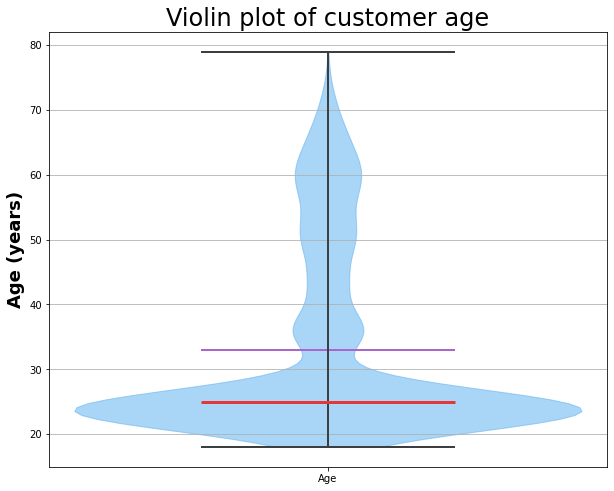

In [18]:
v_y = [df1_c.Age]
v_xticklabels = ['Age']
v_xticks = [1]
v_title = 'Violin plot of customer age'
v_ylabel = 'Age (years)'
udf_violin_plot(p_y=v_y, p_title=v_title, p_ylabel=v_ylabel, p_xticklabels=v_xticklabels, p_xticks=v_xticks)

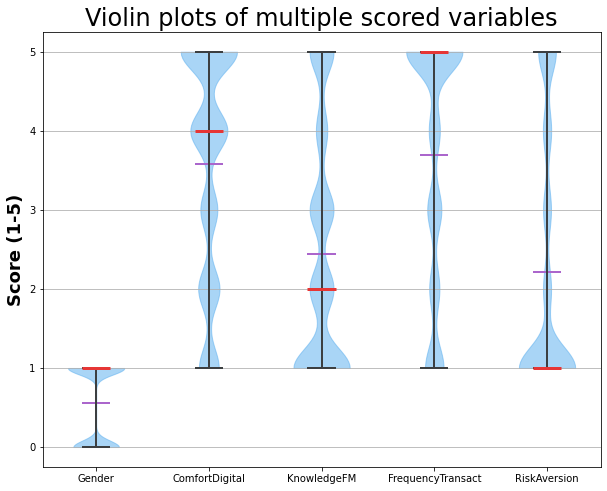

In [19]:
v_y = [df1_c.Gender, df1_c.ComfortDigital, df1_c.KnowledgeFM, df1_c.FrequencyTransact, df1_c.RiskAversion]
v_xticklabels = ['Gender', 'ComfortDigital', 'KnowledgeFM', 'FrequencyTransact', 'RiskAversion']
v_xticks = [1,2,3,4,5]
v_title = 'Violin plots of multiple scored variables'
v_ylabel = 'Score (1-5)'
udf_violin_plot(p_y=v_y, p_title=v_title, p_ylabel=v_ylabel, p_xticklabels=v_xticklabels, p_xticks=v_xticks)

# 6. Addressing highly correlated variables

Highly correlated variables can impact the clustering solution. The following lines of code attempt to decipher whether any correlation exists between customer age and knowledge of financial markets. 

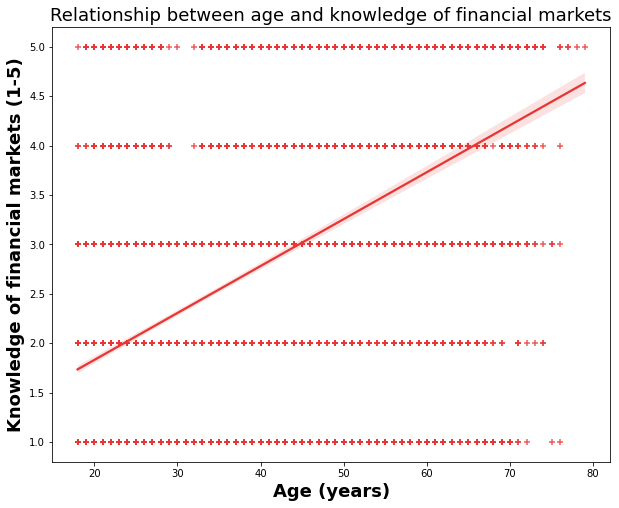

In [20]:
# Scatter plot of age versus income.
ax = plt.figure(figsize=(10,8))
ax = sns.regplot(x="Age", y="KnowledgeFM", data=df1, marker="+", color=pred )
plt.title('Relationship between age and knowledge of financial markets', size=18)
plt.xlabel('Age (years)', size=18, fontweight='bold')
plt.ylabel('Knowledge of financial markets (1-5)', size=18, fontweight='bold')
plt.show()
plt.close()

Is there evidence to suggest a strong correlation between age and knowledge of financial markets? With this in mind, what should be done if the two variables are highly correlated? 

Yes, there is evidence that there is a strong correlation between age and knowledge of financial markets. One way it can be treated is to discard one of the highly correlated variables from the analysis. As k-means clustering is often an iterative procedure, it is advisable to repeat the analysis without one of the variables and determine whether this makes any meaningful difference to the output. Ideally, if we were to repeat the clustering analysis without one of these variables, we would still obtain similar results

WHAT RECOMMENDATION FOR PRODUCT OFFERING AND RECOMMENDATION FOR MARKETING COMMUNICATIONS WILL I GIVE EACH CLUSTER? 

To optimize product offerings and marketing communication for Cluster 0 customers, ABC should focus on offering digital and growth-oriented investment products. AI-assisted services and personal financial advisors could be used to provide tailored recommendations based on their transaction history. Marketing communication should emphasize convenience, ease of use, and potential returns. For example, offering a mobile investment app with a user-friendly interface, providing regular investment insights via social media channels, and hosting financial education webinars. Another product offering recommendation for this cluster would be to provide a platform for fractional investing to encourage investment even with small amounts of capital.

To cater to the needs of Cluster 1, ABC should offer traditional banking services with a personal touch, like personal financial advisors to provide customized solutions. Lower-risk investment products with lower returns would be a good product offering recommendation. For marketing communication, traditional channels like print and email should be used, and educational resources should be offered to increase comfort levels with digital platforms. Loyalty programs for frequent use of traditional banking services could encourage higher transaction frequency. ABC should also partner with financial education or retirement planning organizations to offer specialized services to this segment.
